## **Polynomial Regression**

This acts the same as the **Linear Regression**, with the difference in the function definition. Instead of fitting a line, we can fit a curve using different polynomial functions, for example: $$ f(x)= w_1x_1+w_2x^2+w_3x^3+b $$

The polynomial regression respects the same cost function as the linear regression: $$ J_{wb} = \frac{1}{2m}\sum_{i=1}^{m}(f(x_i) - y_i)^2$$

In the following part we will see an example of polynomial regression, and what issues can occure.

## **Example of Polynomial Regression**

Below is imported a data set that we want to predict. The function is clearly a cuver and by observing we can conclude that this may be a third order curve.

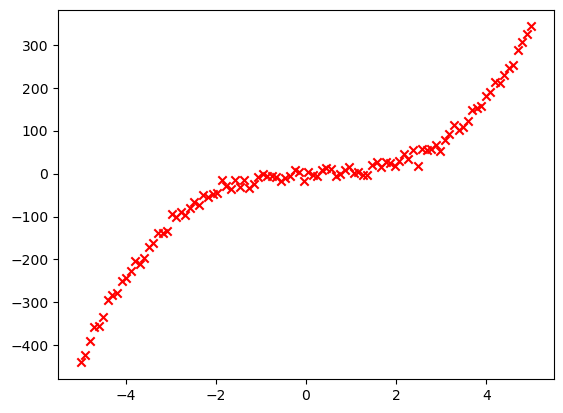

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Data/polynomial_regression_data.csv",delimiter=",", skiprows = 1)
x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y, color = "red", marker = "x")
plt.show()

Here we create the matrix X that has the features. In this case the first feature $x_1 = x$, $x_2 = x^2$ and $x_3 = x^3$. Also to make the algorithm efficient we have to scale the features, and here we use **mean normalization**.

In [3]:
X = np.zeros((x.size,3))
X[:, 0] = x
X[:, 1] = np.pow(x, 2)
X[:, 2] = np.pow(x, 3)

def mean_normalization(X):
    m, n = X.shape
    X_scaled = np.zeros((m,n))
    for index in range(n):
        average = np.average(X[:, index])
        minimum = np.min(X[:, index])
        maximum = np.max(X[:, index])
        X_scaled[:, index] = (X[:, index] - average)/(maximum - minimum)
    return X_scaled

Below is described the gradient descent algorithm. There are also utility functions to calculate the model, compute the cost at each iteration and to compute the partial derivatives used to update the parameters.

In [4]:
def compute_function(X, w, b):
    f = np.dot(X,w) + b
    return f

def compute_cost(X, w, b, y):
    m = y.size
    f = compute_function(X, w, b)
    J = 1/2/m* np.sum((f-y)**2)
    return J

def compute_partial_derivatives(X, w, b, y):
    m = y.size
    f = compute_function(X, w, b)
    dJ_dw = 1/m * np.dot(X.T, f - y)
    dJ_db = 1/m * np.sum(f - y)
    return dJ_dw, dJ_db

def gradient_descent(X, y, w_init, b_init, alpha, iterations):
    history = []
    w = w_init
    b = b_init
    for iteration in range(iterations):
        J = compute_cost(X, w, b, y)
        history.append(J)
        dJ_dw, dJ_db = compute_partial_derivatives(X, w, b, y)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
    return w, b, history

Here we can see the result of the polynomial regression

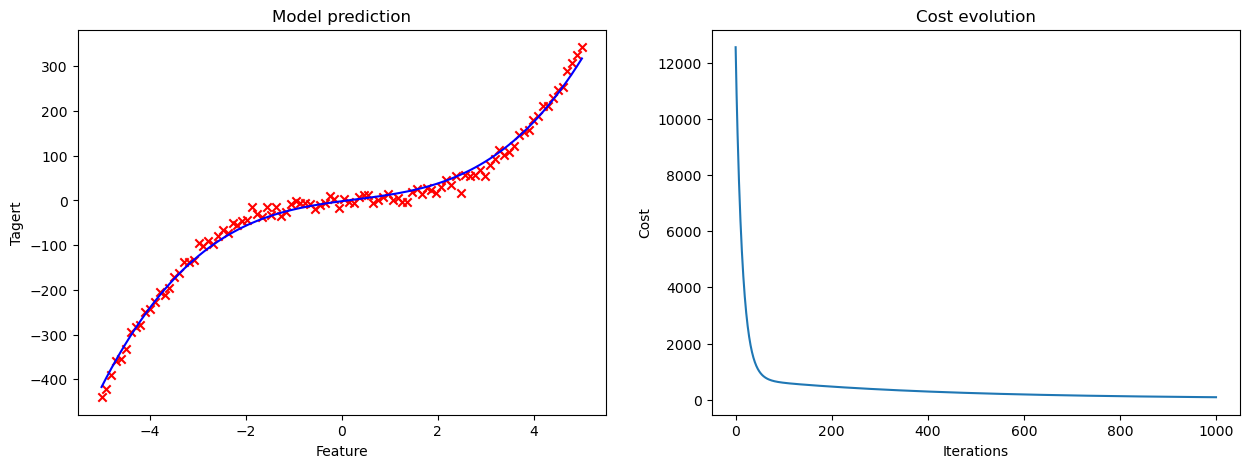

In [5]:
X_scaled = mean_normalization(X)
w, b, history = gradient_descent(X_scaled, y, [0, 0, 0], 0, 0.3, 1000)
f = compute_function(X_scaled, w, b)

figs, axs = figs, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(x, f, color = "blue")
axs[0].scatter(x, y, color = "red", marker = "x")
axs[0].set_title("Model prediction")
axs[0].set_xlabel("Feature")
axs[0].set_ylabel("Tagert")

axs[1].plot(history)
axs[1].set_title("Cost evolution")
axs[1].set_xlabel("Iterations")
axs[1].set_ylabel("Cost")

plt.show()

## **Overfitting Problem** 

Let's imagine trying to fit a second order curve with a 10th order function. Because of the high degree used, we fit very well every single measurament, but we cannot use this model to predict a dynamic, because it may vary in an uncontrolled way. For this issue, we can reduce the order of the indetified function or we can use the so called regularized linear regression. The idea behind this concept is that we use a cost function that penalizes the parameters assigned to higher order terms. The new parameter $\lambda$ represents how much we want to penalize the values of the high order parameters **w**. To do that we simply use this cost function:
$$ J_{wb} = \frac{1}{2m}\sum_{i=1}^{m}(f(x_i) - y_i)^2 + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

The update formulas for the parameters will become :

$$ w_j = (1-\alpha\frac{\lambda}{m})w_j - \alpha\sum_{i=1}^{m}(f(x_i)-y_i)x_i$$
$$ b = b - \alpha\sum_{i=1}^{m}(f(x_i)-y_i) $$